_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Nguyen Y-Quynh (group A2)
 - Cossoul Lucile (group A2)

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [11]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("https://arbimo.github.io/tp-supervised-learning/tp1/yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [12]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [14]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

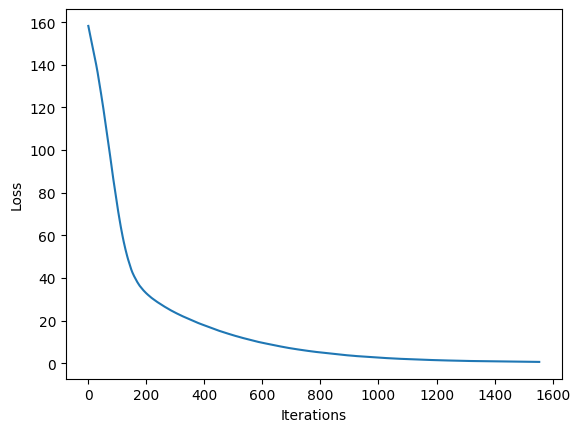

In [15]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?
</div>
<!-- Question End -->

In [16]:
print('mlp.n_layers_ :',  mlp.n_layers_)
print('mlp.hidden_layer_sizes :',  mlp.hidden_layer_sizes)

mlp.n_layers_ : 3
mlp.hidden_layer_sizes : (100,)


# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [17]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(f"dataset type : {type(cal_housing)}")
print(f"number of data : {len(cal_housing.data)}")
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = pd.DataFrame(cal_housing.target,columns=["target"])

X_all, y_all = shuffle(X_all, y_all, random_state=1)

display(X_all.head(10)) # print the first 10 values
display(y_all.head(10))

dataset type : <class 'sklearn.utils._bunch.Bunch'>
number of data : 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


,target
4712,3.550
2151,0.707
15927,2.294
82,1.125
8161,2.254
6636,2.630
17333,2.268
19081,1.662
13298,1.180
7157,1.563


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

In [18]:
# use the last N samples for test (for later use)
num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = 2000
X, y = X_all[:num_samples], y_all[:num_samples]

In [19]:
# TODO 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=1, test_size = 0.20)

#x_train size
print(f"x_train size : {len(X_train)}")
#x_val size
print(f"x_val size : {len(X_val)}")


x_train size : 1600
x_val size : 400


In [20]:
# TODO
print("Initial train data:\n", X_train)



#fit the standard scaler with train input dataset x_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fitted_scaler = sc.fit(X_train)

# tranform x_train, x_val and x_test
std_X_train = fitted_scaler.transform(X_train)
std_X_val = fitted_scaler.transform(X_val)
std_X_test = fitted_scaler.transform(X_test)
print("Standardized data x_train:\n", std_X_train)
print("Standardized val data x_val:\n", std_X_val)
print("Standardized test data x_test:\n", std_X_test)


Initial train data:
        MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4712   3.2500      39.0   4.503205   1.073718      1109.0  1.777244     34.06   
4765   2.3687      38.0   4.370968   1.008065      1019.0  2.739247     34.04   
9998   3.4630       8.0   6.363636   1.166297      1307.0  2.898004     39.08   
9551   2.6908      24.0   5.855204   1.004525       684.0  3.095023     37.37   
16514  2.1186      28.0   4.707581   1.039711      1719.0  3.102888     37.80   
...       ...       ...        ...        ...         ...       ...       ...   
7380   2.5833      37.0   3.606164   0.900685      1354.0  4.636986     33.97   
19680  1.8849      27.0   4.935644   1.051155      1419.0  2.341584     39.15   
6840   2.0250      43.0   4.303279   1.032787       820.0  3.360656     34.07   
20092  3.1076      17.0  11.428005   2.085865      2071.0  2.735799     38.03   
19731  2.1827      26.0   4.521429   0.921429       305.0  2.178571     40.05   

      

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

- Why is it important to fit the scaler only on the training data and not on the entire dataset or separately on each dataset?

We use the Scaler for maintaining the consistency of data points and suppress the differences in the scale of the features of the data.

We only fit the training data because it will modify the variance and mean. Doing it on the whole dataset would give us biased estimates of our model (already using knowledge about the distribution of the test set to set the scale of the training set).
We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

</div>
<!-- Answer Section End -->

In [21]:
# TODO

# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
import numpy as np

mlp = MLPRegressor(hidden_layer_sizes = (200,200,200,), max_iter=4000, random_state=1, learning_rate_init=0.001, activation='tanh') # define the model, with default params
mlp.fit(std_X_train, np.ravel(y_train)) # train the MLP
print('Training score: ', mlp.score(std_X_train, np.ravel(y_train)))

Training score:  0.993783340610986


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

- Is the **validation** score substantially smaller than the **train** score (indicator of overfitting) ?
The validation score is considerably smaller (training: 0.99 and validation: 0.67). We are indeed overfitting to the training data since when testing on another dataset (the validation one), the score is not great.

- Explain how the parameters you chose allow the learned model to overfit.
In this exemple, changing the learning rate did not change the score much (between 0.1 and 0.00001); the number of iteration either (between 2000 and 5000).
The parameters that allowed us to overfit our model were the change of the activation function and the number of neurons in each layer (more than the number of layers itself).
    - We double the size of each layers and add 2 more layers. A single layer with a lot of neurons has more redundancy, and thus is more likely to converge to a good model. Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set to decrease because of the overfit generated.
    - We change the activation function from relu (rectified linear unit function) for the tanh (hyperbolic tan).  The activation function ReLU is linear while the tanh one is S-shaped and nonlinear, it is better to model after our specific data. Tanh is slower, but for our reduced dataset, it works great to overfit.





</div>
<!-- Answer Section End -->

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **validation** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/val score
- training time

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Present in a table the various parameters tested and the associated results. 
</div>
<!-- Question End -->

You can find a cell in the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [22]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import numpy as np
data = []

data.append({'activation': 'relu', 'nb layers' : 3, 'size' : 100, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.83, 'val_score': 0.74, 'time' : 5.6})
data.append({'activation': 'relu', 'nb layers' : 5, 'size' : 100, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.97, 'val_score': 0.67, 'time' : 11.6})
data.append({'activation': 'relu', 'nb layers' : 4, 'size' : 100, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.83, 'val_score': 0.72, 'time' : 4.1})
data.append({'activation': 'relu', 'nb layers' : 3, 'size' : 200, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.85, 'val_score': 0.76,  'time' : 8.0})
data.append({'activation': 'relu', 'nb layers' : 3, 'size' : 200, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': True, 'train_score': 0.73, 'val_score': 0.71,  'time' : 6.3})
data.append({'activation': 'relu', 'nb layers' : 3, 'size' : 200, 'max_iter': 3000, 'learning rate' : 0.0001, 'early_stopping': False, 'train_score': 0.75, 'val_score': 0.73,  'time' : 12.2})
data.append({'activation': 'tanh', 'nb layers' : 3, 'size' : 200, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.78, 'val_score': 0.74,  'time' : 11.3})
data.append({'activation': 'tanh', 'nb layers' : 3, 'size' : 100, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.77, 'val_score': 0.75,  'time' : 10.3})
data.append({'activation': 'relu', 'nb layers' : 3, 'size' : 300, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.84, 'val_score': 0.73,  'time' : 7.7})
data.append({'activation': 'relu', 'nb layers' : 3, 'size' : 300, 'max_iter': 3000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.84, 'val_score': 0.73,  'time' : 7.7})
data.append({'activation': 'relu', 'nb layers' : 4, 'size' : 200, 'max_iter': 5000, 'learning rate' : 0.001, 'early_stopping': False, 'train_score': 0.91, 'val_score': 0.74,  'time' : 8.8})
data.append({'activation': 'relu', 'nb layers' : 4, 'size' : 300, 'max_iter': 5000, 'learning rate' : 0.0001, 'early_stopping': False, 'train_score': 0.90, 'val_score': 0.76,  'time' : 43.3})


table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='val_score', ascending=False)
table

,activation,nb layers,size,max_iter,learning rate,early_stopping,train_score,val_score,time
3,relu,3,200,3000,0.0010,False,0.85,0.76,8.0
11,relu,4,300,5000,0.0001,False,0.90,0.76,43.3
7,tanh,3,100,3000,0.0010,False,0.77,0.75,10.3
0,relu,3,100,3000,0.0010,False,0.83,0.74,5.6
6,tanh,3,200,3000,0.0010,False,0.78,0.74,11.3
10,relu,4,200,5000,0.0010,False,0.91,0.74,8.8
5,relu,3,200,3000,0.0001,False,0.75,0.73,12.2
8,relu,3,300,3000,0.0010,False,0.84,0.73,7.7
9,relu,3,300,3000,0.0010,False,0.84,0.73,7.7
2,relu,4,100,3000,0.0010,False,0.83,0.72,4.1


## Evaluation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
- Evaluate the score of your model on the test set that was not used for training nor for model selection.
- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?
</div>
<!-- Question End -->

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

From our experiments, we found that the best model used:
    activation function: rectangle linear unit function
    number of layers: 3
    size of each layer: 200
    max number of iteration: 3000
    learning rate: 0.001
    early stopping: false


With these parameters, we obtained a score of 0.85 with the training set, 0.76 with the training set and 0.74 with the test set in a time of 8 seconds. 
    

(Another good contender used:
    activation function: rectangle linear unit function
    number of layers: 4
    size of each layer: 300
    max number of iteration: 5000
    learning rate: 0.0001
    early stopping: no


With these parameters, we obtained a score of 0.90 with the training set, 0.76 with the training set but in a time of 43 seconds. So way slower.)
    


- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?

After training this network with these parameters and 15,000 data points, it achieved an accuracy of 0.79 for the training dataset and 0.77 for the testing dataset (compared to 0.74 with the same parameters and only 1,600 datas for training).
The amount of data has an impact on the accuracy of the model, but in our case, the improvment is not significant when adding more data (from 74% to 77%). With those parameters, the time spending is still worthwhile (from 8 seconds to 16 seconds). The time has doubled but remains very short and allows us to improve precision

</div>
<!-- Answer Section End -->